# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.282209e+01     1.455933e+01
 * time: 0.002877950668334961
     1     6.177232e+01     8.989065e+00
 * time: 0.008732080459594727
     2     5.823014e+01     1.213509e+01
 * time: 0.021821022033691406
     3     3.975672e+01     8.491670e+00
 * time: 0.11208009719848633
     4     2.892563e+01     7.306729e+00
 * time: 0.12988805770874023
     5     1.803794e+01     4.197048e+00
 * time: 0.1454770565032959
     6     1.178908e+01     3.218557e+00
 * time: 0.15868806838989258
     7     1.176023e+01     7.027465e+00
 * time: 0.16886210441589355
     8     1.054758e+01     5.448782e+00
 * time: 0.18169713020324707
     9     8.825915e+00     2.710078e+00
 * time: 0.19487404823303223
    10     8.022416e+00     2.146526e+00
 * time: 0.20903301239013672
    11     7.590227e+00     3.669021e+00
 * time: 0.22039198875427246
    12     7.156069e+00     3.239238e+00
 * time: 0.23109102249145508
    13     6.753667e+00     1.985062e+00
 * tim

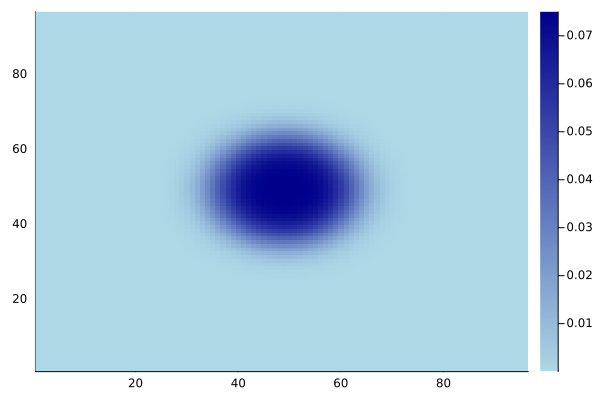

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)